In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [2]:
#import data
data = pd.read_csv('exams.csv')
#this dataset has been downloaded from https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics/data

In [3]:
# printing the first 10 rows
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,bachelor's degree,free/reduced,none,49,53,56
1,male,group C,associate's degree,standard,completed,68,56,57
2,female,group B,associate's degree,standard,none,95,95,96
3,female,group C,high school,standard,completed,84,92,94
4,female,group B,master's degree,standard,none,72,80,74
5,male,group C,some college,free/reduced,none,85,77,73
6,male,group D,high school,standard,none,95,83,89
7,male,group A,master's degree,free/reduced,none,69,69,63
8,male,group E,bachelor's degree,free/reduced,none,52,53,50
9,female,group C,associate's degree,standard,completed,79,94,90


In [4]:
# displaying the summary information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# displaying the data descriptive statistics
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.530000,69.719000,68.521000
std,15.355419,14.791783,15.552602
min,11.000000,19.000000,16.000000
25%,57.000000,59.000000,58.000000
50%,67.000000,70.000000,68.000000
75%,77.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [6]:
# since the average of the math, reading and writing scores are almost equal, I will create a column for average
data['average'] = (data['math score'] + data['reading score'] + data['writing score'])/3

In [7]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group D,bachelor's degree,free/reduced,none,49,53,56,52.666667
1,male,group C,associate's degree,standard,completed,68,56,57,60.333333
2,female,group B,associate's degree,standard,none,95,95,96,95.333333
3,female,group C,high school,standard,completed,84,92,94,90.000000
4,female,group B,master's degree,standard,none,72,80,74,75.333333
5,male,group C,some college,free/reduced,none,85,77,73,78.333333
6,male,group D,high school,standard,none,95,83,89,89.000000
7,male,group A,master's degree,free/reduced,none,69,69,63,67.000000
8,male,group E,bachelor's degree,free/reduced,none,52,53,50,51.666667
9,female,group C,associate's degree,standard,completed,79,94,90,87.666667


In [8]:
# importing the necessary libraries
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
gender=data["gender"].value_counts()
label=gender.index
counts=gender.values
colors=['#d95f0e','#fde0dd']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text="Students' Gender Representation")
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [10]:
gender=data["parental level of education"].value_counts()
label=gender.index
counts=gender.values
colors=['#a8ddb5','#fff7bc','#efedf5','#a1d99b','#8856a7','#e0ecf4']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text="Parental Level of Education")
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [11]:
gender=data["lunch"].value_counts()
label=gender.index
counts=gender.values
colors=['#a1d99b','#8856a7']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text="Students' Lunch Type")
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [12]:
gender=data["test preparation course"].value_counts()
label=gender.index
counts=gender.values
colors=['#a8ddb5','#fff7bc']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text="Students' Preparation Course Status")
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [13]:
# race/ethnicity column wont be used during training
data.drop("race/ethnicity", axis=1, inplace=True)

In [14]:
# label encoding
data["gender"] = data["gender"].map({"male": 1, "female": 0})
data["parental level of education"] = data["parental level of education"].map({"master's degree": 5,"bachelor's degree": 4,"associate's degree": 3,
                                                                               "some college": 2,"high school": 1,"some high school": 0})
data["lunch"] = data["lunch"].map({"standard": 1,"free/reduced": 0})
data["test preparation course"] = data["test preparation course"].map({"completed": 1,"none": 0})
print(data.head(10))


   gender  parental level of education  lunch  test preparation course  \
0       0                            4      0                        0   
1       1                            3      1                        1   
2       0                            3      1                        0   
3       0                            1      1                        1   
4       0                            5      1                        0   
5       1                            2      0                        0   
6       1                            1      1                        0   
7       1                            5      0                        0   
8       1                            4      0                        0   
9       0                            3      1                        1   

   math score  reading score  writing score    average  
0          49             53             56  52.666667  
1          68             56             57  60.333333  
2          95 

In [15]:
# this function returns the grade of a student
def categorizeIntoGrades(x):
  if x <= 100 and x >= 80:
    grade = 'A'
  elif x < 80 and x >= 60:
    grade = 'B'
  elif x < 60 and x >= 40:
    grade = 'C'
  elif x < 40 and x >= 20:
    grade = 'D'
  else:
    grade = 'E'

  return grade

In [16]:
# calling the function
data['grade'] = data['average'].apply(lambda x: categorizeIntoGrades(x))

In [17]:
print(data.head(10))

   gender  parental level of education  lunch  test preparation course  \
0       0                            4      0                        0   
1       1                            3      1                        1   
2       0                            3      1                        0   
3       0                            1      1                        1   
4       0                            5      1                        0   
5       1                            2      0                        0   
6       1                            1      1                        0   
7       1                            5      0                        0   
8       1                            4      0                        0   
9       0                            3      1                        1   

   math score  reading score  writing score    average grade  
0          49             53             56  52.666667     C  
1          68             56             57  60.333333     

In [18]:
#label encoding for the grade column
data["grade"] = data["grade"].map({"A": 4,"B": 3,"C": 2,"D": 1,"E": 0})
print(data.head(10))

   gender  parental level of education  lunch  test preparation course  \
0       0                            4      0                        0   
1       1                            3      1                        1   
2       0                            3      1                        0   
3       0                            1      1                        1   
4       0                            5      1                        0   
5       1                            2      0                        0   
6       1                            1      1                        0   
7       1                            5      0                        0   
8       1                            4      0                        0   
9       0                            3      1                        1   

   math score  reading score  writing score    average  grade  
0          49             53             56  52.666667      2  
1          68             56             57  60.333333   

In [19]:
#splitting data into training and testing groups
from sklearn.model_selection import train_test_split
X = np.array(data[["gender", "parental level of education", "lunch", "test preparation course"]])
Y = np.array(data[["grade"]])

In [20]:
#splitting the dataframe into training and testing sets. The size of the test set is 20% while the size of the training set is
#80% of the entire dataframe
#The ravel() function returns a flattened 1D array
x_train, x_test, y_train, y_test = train_test_split(X, Y.ravel(), test_size=0.20, random_state=42)

Machine Learning Classification Model

In [21]:
# importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier     #decision tree
from sklearn.naive_bayes import GaussianNB       #naive bayes
from sklearn.neighbors import KNeighborsClassifier  #knn
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.svm import SVC                         #support vector machine

#performance evaluation matrix/confusion matrix components
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [22]:
#initializing the classifiers
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()
rf = RandomForestClassifier()
svm = SVC()

In [23]:
#training the classifiers
knn.fit(x_train, y_train)
dt.fit(x_train, y_train)
nb.fit(x_train, y_train)
rf.fit(x_train, y_train)
svm.fit(x_train, y_train)

SVC()

In [33]:
#testing the classifiers
print('knn score ',knn.score(x_test, y_test))
print('decision tree score ',dt.score(x_test, y_test))
print('naive bayes score ',nb.score(x_test, y_test))
print('random for score ',rf.score(x_test, y_test))
print('svm score ',svm.score(x_test, y_test))

knn score  0.435
decision tree score  0.51
naive bayes score  0.51
random for score  0.515
svm score  0.475


In [25]:
y_pred_knn = knn.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_svm = svm.predict(x_test)

In [26]:
#This function will be used by the models to display the performance evaluation metrics
def performance_metrics(y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  #since this is a multi-class classification problem, i will used the weighted parameter instead of the binary parameter
  precision = precision_score(y_test, y_pred, average='weighted',pos_label=1)
  recall = recall_score(y_test, y_pred, average='weighted', pos_label=1)
  f1 = f1_score(y_test, y_pred, average='weighted', pos_label=1)

  #keeping all the performance metrics in a list
  return [accuracy, precision, recall, f1]

In [27]:
#Perfomance evaluation metrics for knn
results_knn = performance_metrics(y_pred_knn)

#Perfomance evaluation metrics for decision tree
results_decision_tree = performance_metrics(y_pred_dt)

#Perfomance evaluation metrics for naive bayes
results_naive_bayes = performance_metrics(y_pred_nb)

#Perfomance evaluation metrics for random forest
results_random_forest = performance_metrics(y_pred_rf)

#Perfomance evaluation metrics for svm
results_svm = performance_metrics(y_pred_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.1

In [28]:
#Displaying all the evaluation metrics at once
result = {'KNN': results_knn,
        'Decision Tree':results_decision_tree,
        'Naive Bayes': results_naive_bayes,
        'Random Forest': results_random_forest,
        'SVM': results_svm}

# Convert the dictionary to a DataFrame
display_df = pd.DataFrame(result, index=['Accuracy', 'Precision','Recall', 'F1 Score'])

# Transpose and display the transposed DataFrame
print(display_df.T)

               Accuracy  Precision  Recall  F1 Score
KNN               0.435   0.409681   0.435  0.411499
Decision Tree     0.510   0.519662   0.510  0.485050
Naive Bayes       0.510   0.533863   0.510  0.468568
Random Forest     0.515   0.523867   0.515  0.489008
SVM               0.475   0.447513   0.475  0.336372


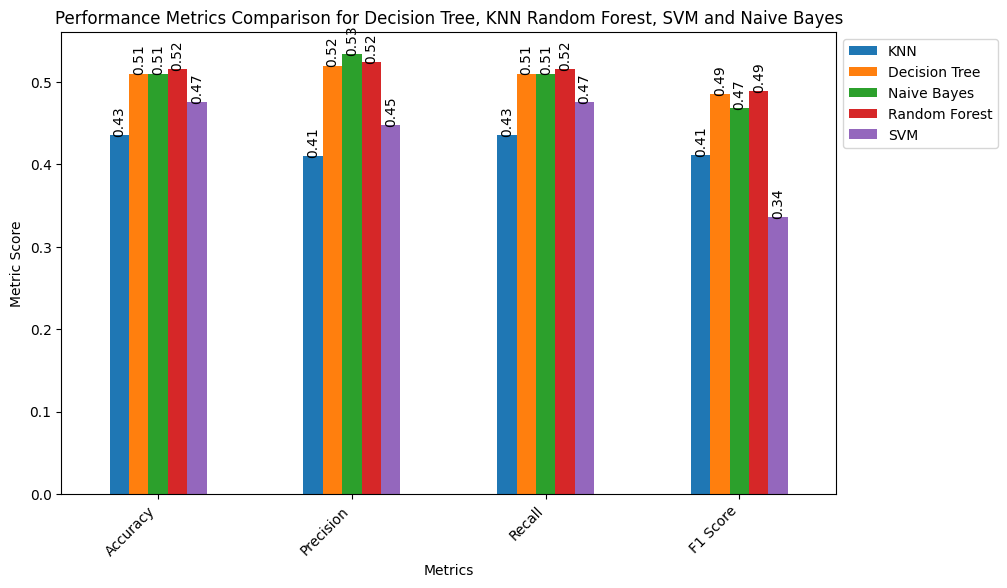

In [29]:
# Comparison chart between different metrics for Decision Tree, KNN, Random Forest, SVM, Naive Bayes
indecies = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create a DataFrame
metrics_df = pd.DataFrame(result, index=indecies)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
metrics_df.plot(kind='bar', ax=ax)

# Display values on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation='vertical')

ax.set_ylabel('Metric Score') # y-axis label
ax.set_xlabel('Metrics') # x-axis label
ax.set_title('Performance Metrics Comparison for Decision Tree, KNN Random Forest, SVM and Naive Bayes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot

In [30]:
print("Enter student details to predict his/her average grade in math, reading and writing")
a = int(input("Enter the student's gender (1 = male, 0 = female): "))
b = int(input("Enter the student's parental level of education (Master's degree = 5, Bachelor's degree = 4, Associate's degree = 3, Some college = 2, High school = 1, Some high school = 0): "))
c = int(input("Enter the student's type of lunch (1 = Standard, 0 = Free/reduced): "))
d = int(input("Enter the student's test preparation course (1 = Completed, 0 = None): "))
features = np.array([[a, b, c, d]])

Enter student details to predict his/her average grade in math, reading and writing
Enter the student's gender (1 = male, 0 = female): 1
Enter the student's parental level of education (Master's degree = 5, Bachelor's degree = 4, Associate's degree = 3, Some college = 2, High school = 1, Some high school = 0): 5
Enter the student's type of lunch (1 = Standard, 0 = Free/reduced): 1
Enter the student's test preparation course (1 = Completed, 0 = None): 1


In [31]:
#This function returns a grade in as an alphabetical value
def numberIntoGrades(x):
  if x == 5:
    grade = 'A'
  elif x == 4:
    grade = 'B'
  elif x == 3:
    grade = 'C'
  elif x == 2:
    grade = 'D'
  else:
    grade = 'E'

  return grade

In [32]:
grade_knn = numberIntoGrades(knn.predict(features))
grade_dt = numberIntoGrades(dt.predict(features))
grade_nb = numberIntoGrades(nb.predict(features))
grade_rf = numberIntoGrades(rf.predict(features))
grade_svm = numberIntoGrades(svm.predict(features))

print("Students average grade (KNN): ", grade_knn)
print("Students average grade (Decision Tree ): ", grade_dt)
print("Students average grade (Naive Bayes): ", grade_nb)
print("Students average grade (Random Forest ): ", grade_rf)
print("Students average grade (Support Vector Machine): ", grade_svm)

Students average grade (KNN):  C
Students average grade (Decision Tree ):  B
Students average grade (Naive Bayes):  B
Students average grade (Random Forest ):  B
Students average grade (Support Vector Machine):  C


Based on the output of the perfomance evaluation metrics of all classification models, Decision Tree, Random Forest and Naive Bayes have the highest values. Therefore, I recommend these three as the prefered classification models in this context.